# Práctica 1: Aprendizaje automático

__Fecha de entrega: XX de YYY de 2022 (CAMBIAR PARA DAR 3 SEMANAS A CADA GRUPO)__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

In [21]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 

El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
  - `Customer ID` es el identificador del cliente
  - `Gender` es el género del cliente (Male|Female)
  - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
  - `Age` es la edad del cliente
  - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [7]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv', index_col = 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

Gender                                Female        Male
Age                        count  112.000000   88.000000
                           mean    38.098214   39.806818
                           std     12.644095   15.514812
                           min     18.000000   18.000000
                           25%     29.000000   27.750000
                           50%     35.000000   37.000000
                           75%     47.500000   50.500000
                           max     68.000000   70.000000
Annual Income (k$)         count  112.000000   88.000000
                           mean    59.250000   62.227273
                           std     26.011952   26.638373
                           min     16.000000   15.000000
                           25%     39.750000   45.500000
                           50%     60.000000   62.500000
                           75%     77.250000   78.000000
                           max    126.000000  137.000000
Spending Score (1-100)     count  112.000000   88.000000
                           mean    51.526786   48.511364
                           std     24.114950   27.896770
                           min      5.000000    1.000000
                           25%     35.000000   24.500000
                           50%     50.000000   50.000000
                           75%     73.000000   70.000000
                           max     99.000000   97.000000
Annual Income (standard)   count  112.000000   88.000000
                           mean    -0.050002    0.063639
                           std      0.992861    1.016771
                           min     -1.700830   -1.738999
                           25%     -0.794306   -0.574832
                           50%     -0.021375    0.074049
                           75%      0.637048    0.665675
                           max      2.497807    2.917671
Spending Score (standard)) count  112.000000   88.000000
                           mean     0.051508   -0.065555
                           std      0.936180    1.082996
                           min     -1.754735   -1.910021
                           25%     -0.590088   -0.997714
                           50%     -0.007764   -0.007764
                           75%      0.885132    0.768667
                           max      1.894492    1.816849

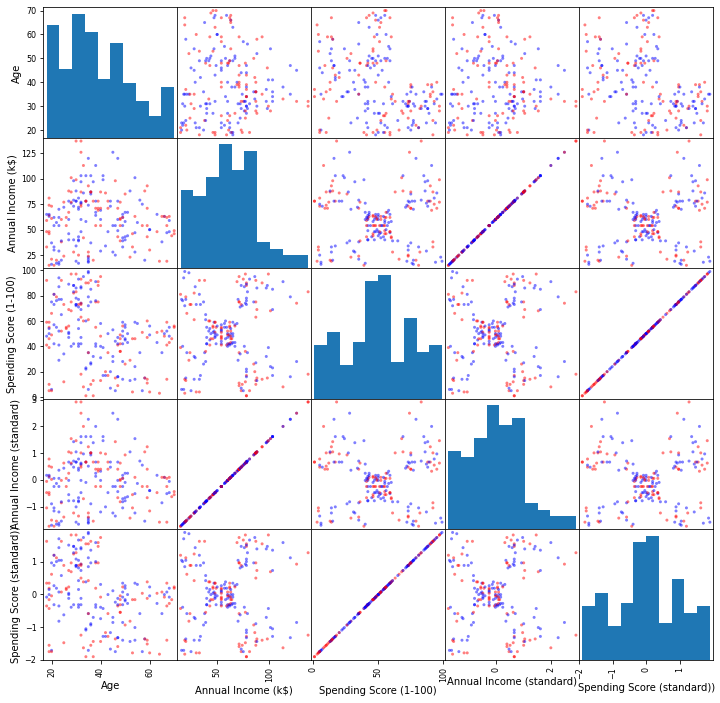

In [22]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df.groupby('Gender').describe().transpose() #Mostramos los datos divididos con géneros de forma que nos de un mayor desgllose de las variables numericas

#generamos los diferentes diagramas de dispersión
dic_colors = { 'Male': 'red', 'Female': 'blue'}
colors = df['Gender'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)
df.groupby('Gender').describe().transpose()



### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

<Axes: xlabel='Gender'>

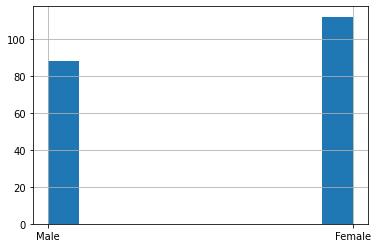

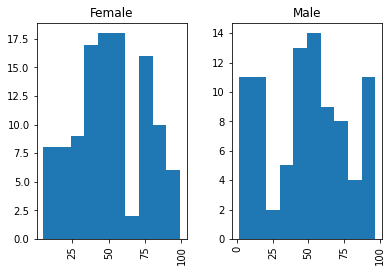

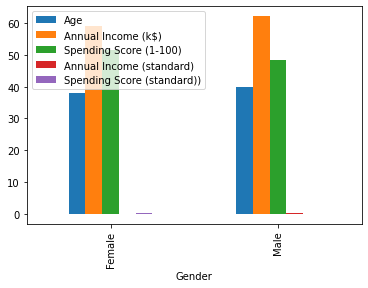

In [23]:

df['Gender'].hist() #vemos que hay mas mujeres que hombres
df.hist('Spending Score (1-100)', by='Gender') #miramos como varía el spending score
df.groupby('Gender').mean('Spending Score (1-100)').plot.bar() #agrupado por genero tomando como media el spending score.





<Axes: xlabel='Gender'>

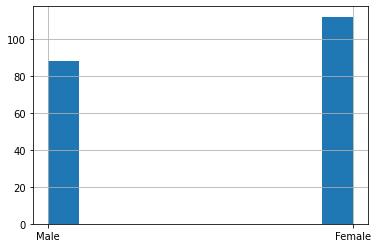

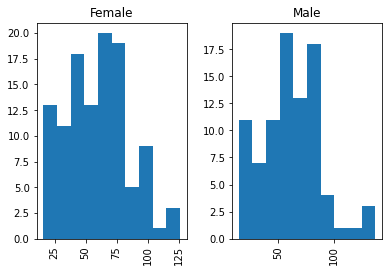

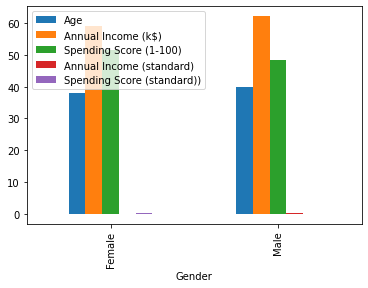

In [24]:
df['Gender'].hist() #vemos que hay mas mujeres que hombres
df.hist('Annual Income (k$)', by='Gender') #miramos como varía el spending score
df.groupby('Gender').mean('Annual Income (k$)').plot.bar() #agrupado por genero tomando como media el spending score.


## 3) Preprocesar los datos

Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

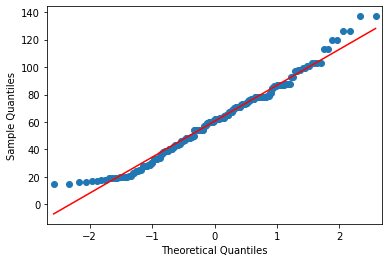

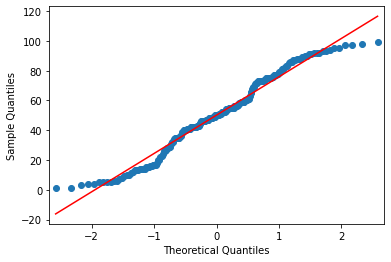

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (standard),Spending Score (standard))
CustomerID,,,,,,
1,Male,19,15,39,-1.738999,-0.434801
2,Male,21,15,81,-1.738999,1.195704
3,Female,20,16,6,-1.700830,-1.715913
4,Female,23,16,77,-1.700830,1.040418
5,Female,31,17,40,-1.662660,-0.395980
6,Female,22,17,76,-1.662660,1.001596
7,Female,35,18,6,-1.624491,-1.715913
8,Female,23,18,94,-1.624491,1.700384
9,Male,64,19,3,-1.586321,-1.832378


In [25]:
from sklearn.preprocessing import StandardScaler
from numpy.random import seed, randn
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
#Utilizamos el siguiente codigo para ver si se corresponde con una normal las variables Spending Score y Annual Income.
seed(1993)
qqplot(df['Annual Income (k$)'] , line='s') #nos muestra el grafico si los puntos estan sobre la linea es una normal si no no lo es
qqplot(df['Spending Score (1-100)'] , line='s') 
plt.show() #mostramos los graficos
# Viendo ambos graficos hemos decidido que la distribucion de ambas variables se acerca bastante a la de una normal entonces hemos decidido standarizar ambas columnas
standard_scaler = StandardScaler()

#ajustamos ambas columnas
standard_scaler.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Transformamos los datos estandarizados y pasamos de la variables Annual Income(k$) y Spending Score(1-100) a las variables estandarizadas Annual Income(standard) y Spnding Score(standard)
df[['Annual Income (standard)', 'Spending Score (standard))']] = standard_scaler.transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
#mostramos los 30 primeros
df.head(30)




## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

In [40]:
#importamos todas las librerias necesarias para poder ejecutar este punto 4
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [26]:
def plot_clusters(labels=None, centers=None):
    #distintos colores para representar los clusters 10 para tener colores diferentes
    colors = ['red','green','blue','black','yellow','pink','orange','purple','grey','brown'] 
    fig = plt.figure(figsize=(10,10))#establecemos el tamaño de las figuras
    #Ahora definimos el diagrama estableciendo como eje x el annual income estandarizado y el ejey como el spending score estandarizado
    plt.scatter(df['Annual Income (standard)'], df['Spending Score (standard))'], c=labels, cmap=ListedColormap(colors))
    #esta función sacada del tutorial nos pinta los centros de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)     
    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


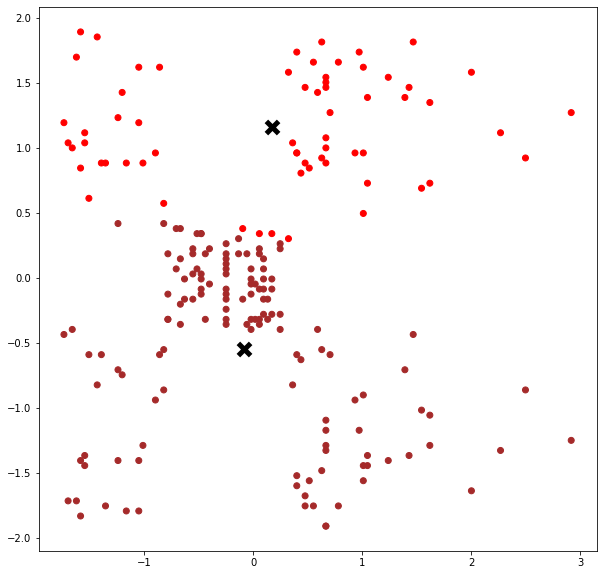

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


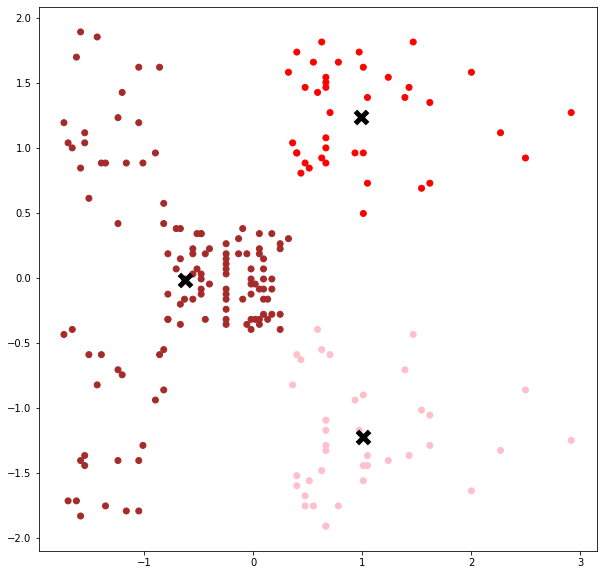

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


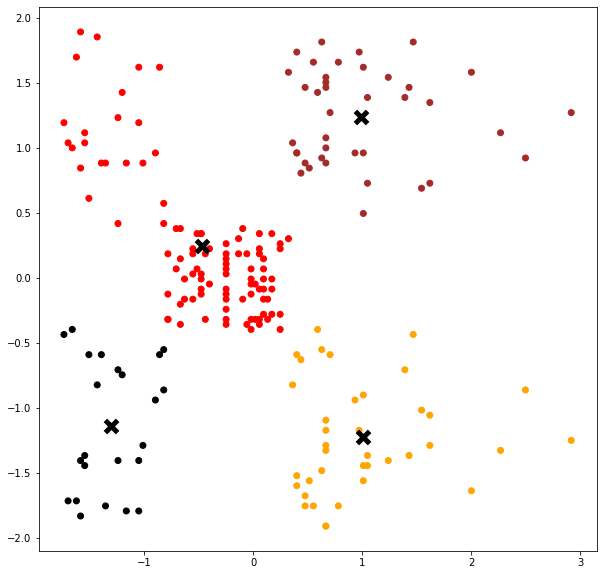

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


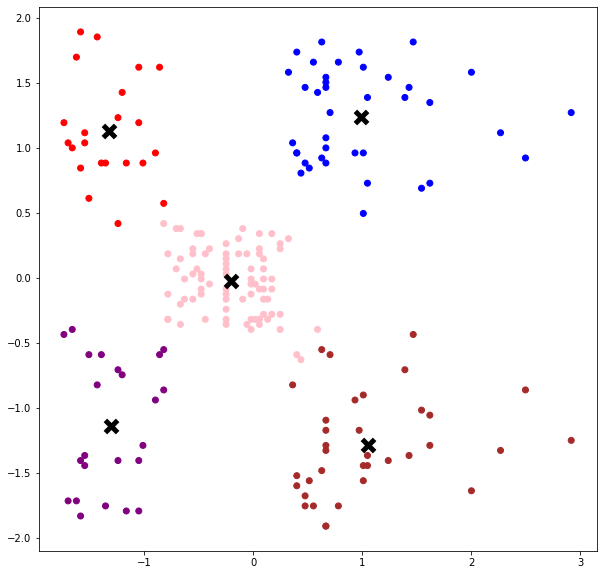

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


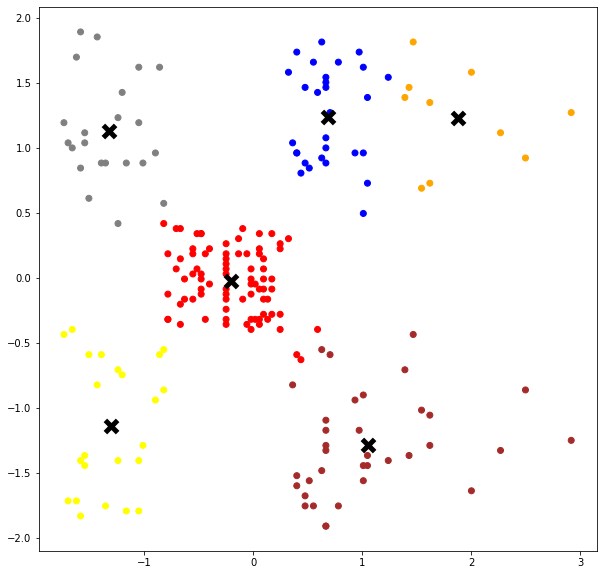

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


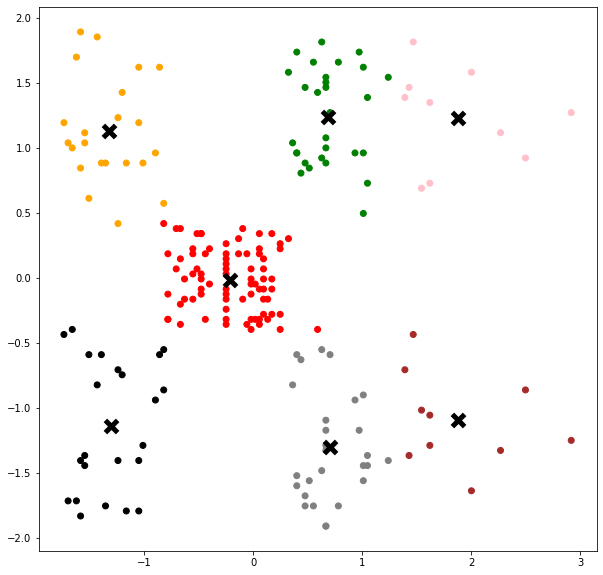

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


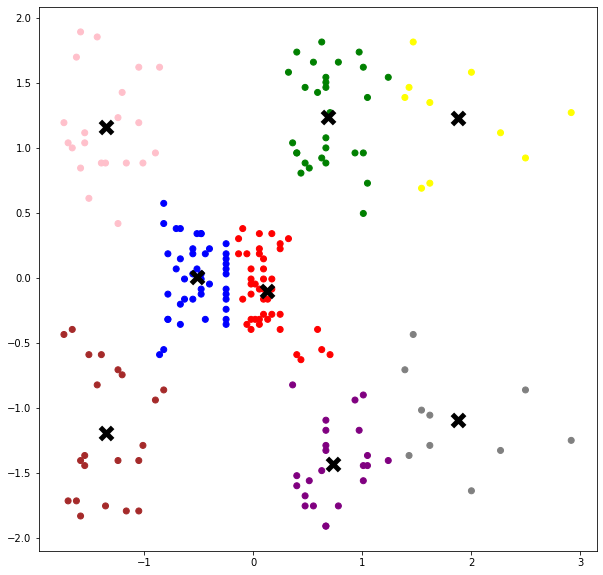

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


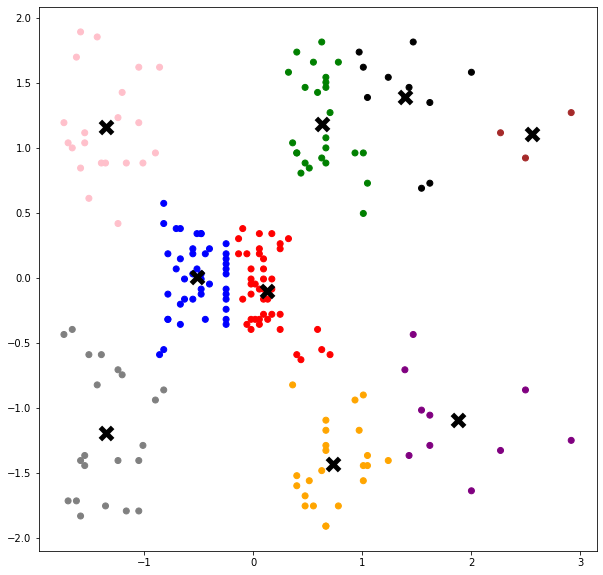

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


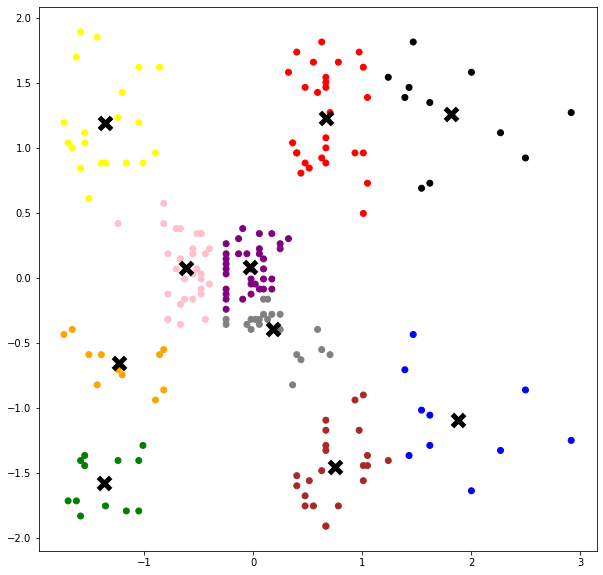

In [39]:

K_MAX = 11 #establecemos el número máximo posible de clusters
davies_boulding = np.zeros(K_MAX-2) #definimos el índice de davies_boulding 
for k in range(2, K_MAX): #hacemos el for entre el rango máximo y mínimo que buscamos
    k_means_mall = KMeans(init='random', n_clusters=k, random_state=333) #iniciamos el algoruitmo de k-means con un random state aleatorio pero fijo
    k_means_mall.fit(df[['Annual Income (standard)', 'Spending Score (standard))']])
    #Hacemos los diagramas de los clusters dependiendo si queremos entre 2 y 10 clusters que veremos representados una vez ejecutemos el programa
    plot_clusters(k_means_mall.labels_, k_means_mall.cluster_centers_) 
    #Calculamos el índice de davies boulding para todos los posibles clusters con respecto al annual income y spending score estandarizaros
    davies_boulding[k-2] = davies_bouldin_score(df[['Annual Income (standard)', 'Spending Score (standard))']], k_means_mall.labels_) 

Mostramos los índices de Davies Boulding:  [1.21860632 0.71648216 0.7095565  0.57223562 0.65456747 0.71478412
 0.76096039 0.77405912 0.78196714]


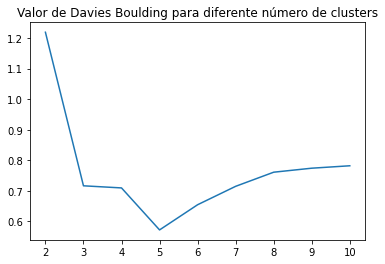

In [28]:
    plt.plot(range(2, K_MAX), davies_boulding) #mostramos el gráfico que buscamos
    plt.title('Valor de Davies Boulding para diferente número de clusters')
    print('Mostramos los índices de Davies Boulding: ',davies_boulding) #mostramos los valores de davies boulding
    #Después de mirar la gráfica y los valores del array vemos que el número óptimo de clusters es 5

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


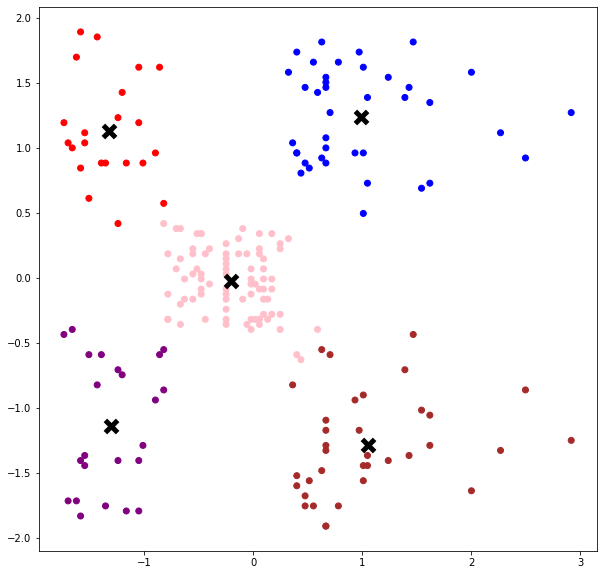

cluster                                 0.0         1.0        2.0        3.0  \
Age                        count  22.000000   39.000000  81.000000  22.000000   
                           mean   45.090909   40.384615  42.802469  25.590909   
                           std    13.525669   11.226415  16.435799   5.386571   
                           min    19.000000   19.000000  18.000000  18.000000   
                           25%    35.250000   34.000000  27.000000  21.250000   
                           50%    45.500000   41.000000  47.000000  23.500000   
                           75%    53.750000   47.000000  54.000000  30.000000   
                           max    67.000000   59.000000  70.000000  35.000000   
Annual Income (k$)         count  22.000000   39.000000  81.000000  22.000000   
                           mean   25.727273   86.538462  54.888889  25.727273   
                           std     7.566731   16.312485   8.961027   7.566731   
                           min    15.000000   69.000000  39.000000  15.000000   
                           25%    19.250000   75.500000  48.000000  19.250000   
                           50%    24.500000   79.000000  54.000000  24.500000   
                           75%    32.250000   95.000000  62.000000  32.250000   
                           max    39.000000  137.000000  75.000000  39.000000   
Spending Score (1-100)     count  22.000000   39.000000  81.000000  22.000000   
                           mean   20.227273   19.641026  50.975309  79.181818   
                           std    12.891237   12.480484   8.811889  10.795221   
                           min     3.000000    1.000000  36.000000  61.000000   
                           25%     7.750000   10.500000  46.000000  73.000000   
                           50%    16.000000   17.000000  50.000000  77.000000   
                           75%    31.750000   27.500000  55.000000  85.750000   
                           max    40.000000   58.000000  93.000000  99.000000   
Annual Income (standard)   count  22.000000   39.000000  81.000000  22.000000   
                           mean   -1.329545    0.991583  -0.216463  -1.329545   
                           std     0.288818    0.622638   0.342037   0.288818   
                           min    -1.738999    0.322150  -0.822933  -1.738999   
                           25%    -1.576779    0.570251  -0.479408  -1.576779   
                           50%    -1.376390    0.703844  -0.250391  -1.376390   
                           75%    -1.080577    1.314555   0.054964  -1.080577   
                           max    -0.822933    2.917671   0.551167  -0.822933   
Spending Score (standard)) count  22.000000   39.000000  81.000000  22.000000   
                           mean   -1.163588   -1.186347   0.030099   1.125119   
                           std     0.500458    0.484512   0.342091   0.419087   
                           min    -1.832378   -1.910021  -0.551266   0.419273   
                           25%    -1.647975   -1.541216  -0.163051   0.885132   
                           50%    -1.327697   -1.288876  -0.007764   1.040418   
                           75%    -0.716258   -0.881249   0.186343   1.380106   
                           max    -0.395980    0.302808   1.661563   1.894492   

cluster                                  4.0  
Age                        count   35.000000  
                           mean    32.657143  
                           std      3.749062  
                           min     27.000000  
                           25%     30.000000  
                           50%     32.000000  
                           75%     35.500000  
                           max     40.000000  
Annual Income (k$)         count   35.000000  
                           mean    86.342857  
                           std     14.262132  
                           min     69.000000  
                           25%     77.000000  
                    

In [30]:

#Como habiamos visto que el numero óptimo de clusters era 5 hacemos el k-means con 5.
cinco_means = KMeans(init='random', n_clusters=5, random_state=333)
cinco_means.fit(df[['Annual Income (standard)', 'Spending Score (standard))']])
cinco_labels = cinco_means.labels_
cinco_centers = cinco_means.cluster_centers_
plot_clusters(cinco_labels, cinco_centers)
#Añadimos a los datos el cluster en el que se encuentra cada dato entonces como hemos visto en el enunciado los datos están ordenados
#Así podemos analizar cada cluster sin ningún problema y analizarlos
df_aux = df.assign(cluster=pd.Series(data=cinco_means.labels_))
df_aux
df_aux.groupby(["cluster"]).describe().transpose()
#Podemos ver que todos los clusters estan bastante nivelados en numero salvo el cluster 2 que tiene mucho mayor número como podemos ver tanto en la tabla como en el propio diagrama
#Tiene eso sentido porque estamos en la parte media del todo, que establecemos como clase media que es lo que suele pasar en general que lo que se gasta es acorde a lo que 

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


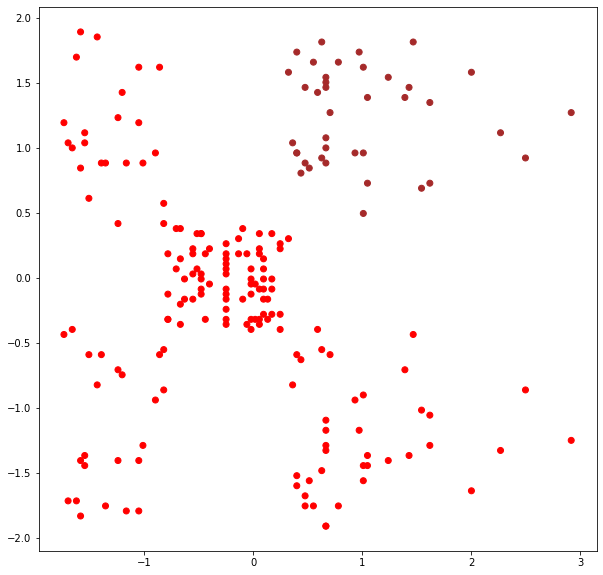

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


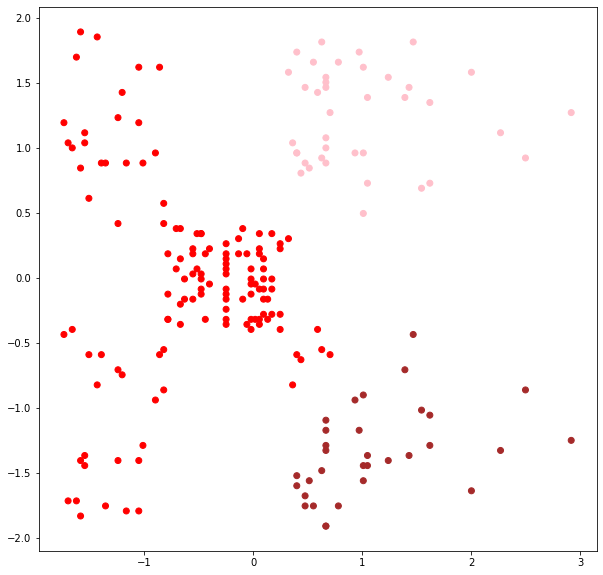

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


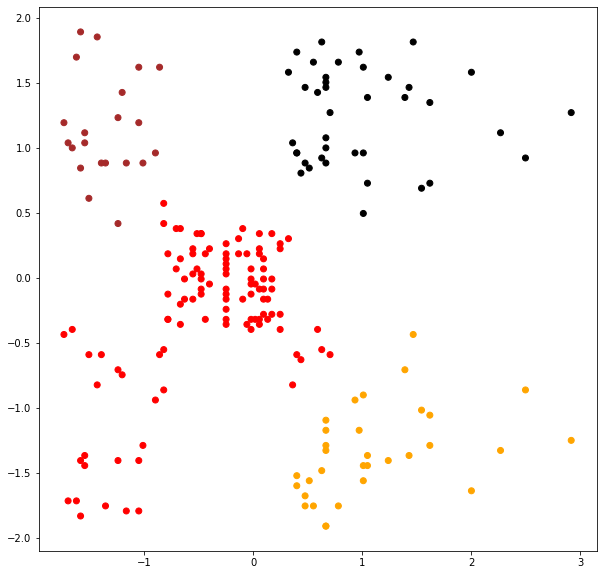

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


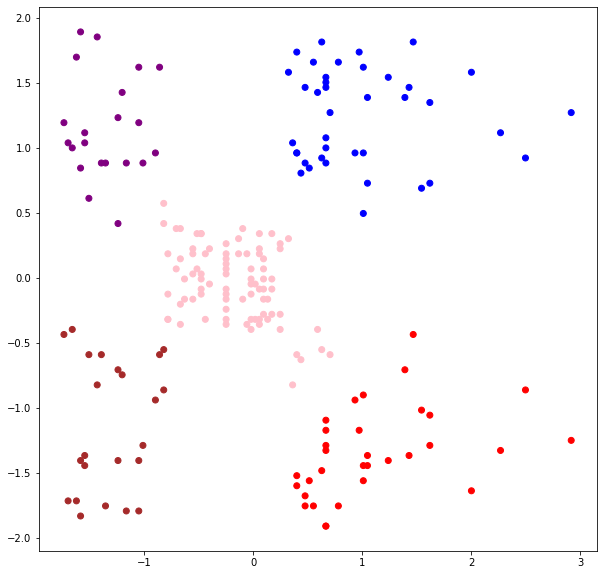

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


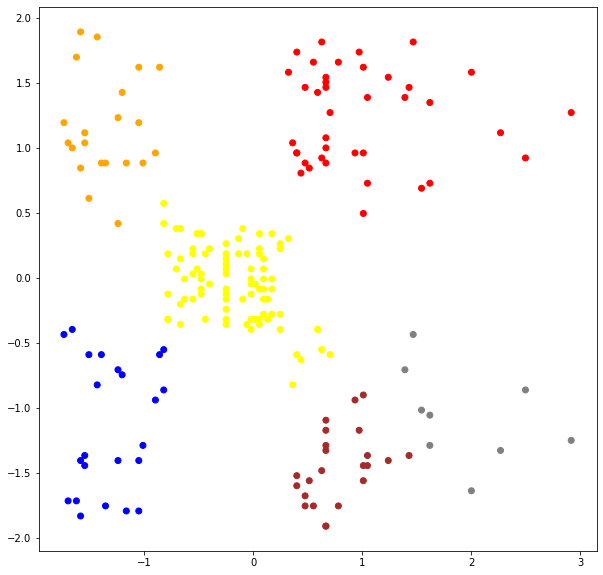

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


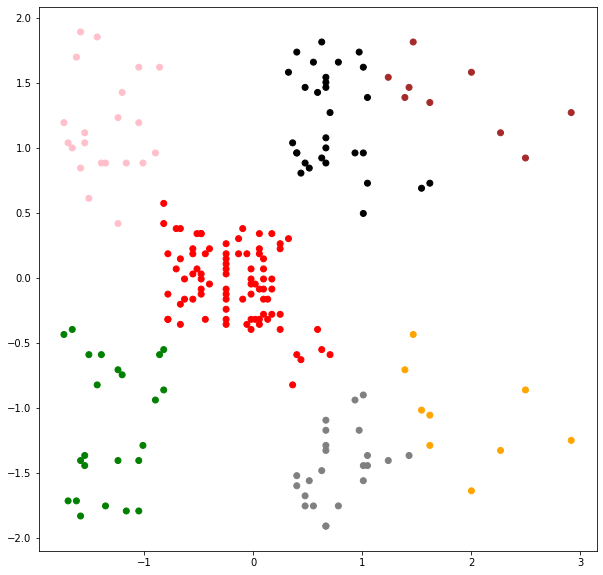

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


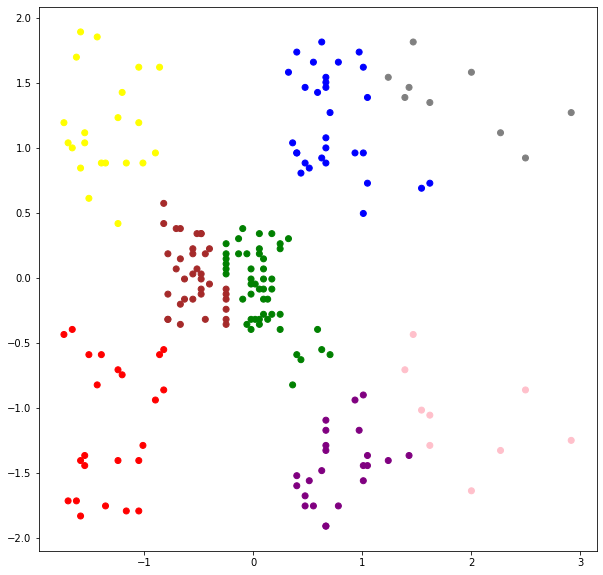

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


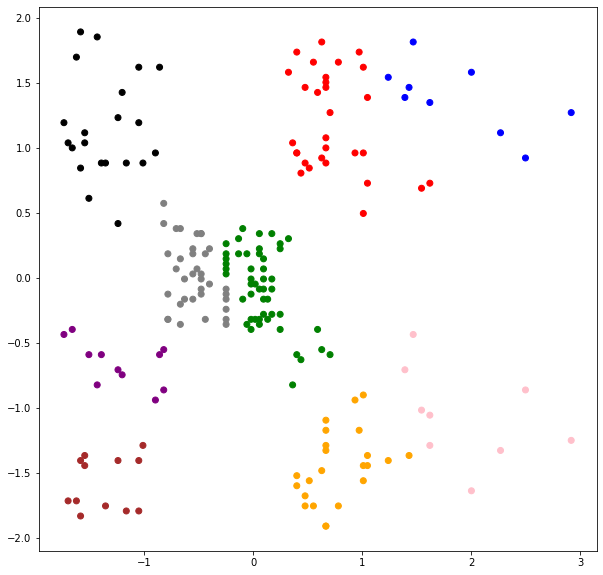

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


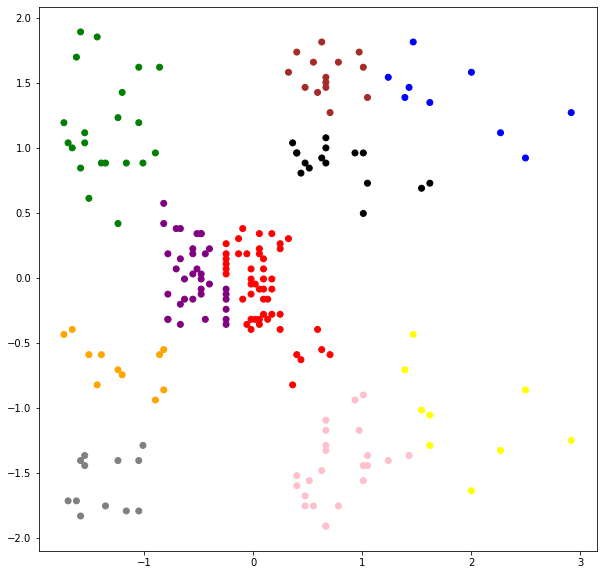

In [37]:
#Empezamos a realizar lo mismo ahora con el clustering jerarquico aglomeratico
K_MAX_aglo = 11 #establecemos de nuevo el máximo número de clusters en 11 que asi nos dará un máximo de 10 clusters
davies_boulding_aglo = np.zeros(K_MAX_aglo-2)
for k in range(2, K_MAX_aglo): 
    cja = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean') #utilizamos la funcion sacada de sckitlearn para hacer el clustering aglomerativo
    cja.fit(df[['Annual Income (standard)', 'Spending Score (standard))']])
    plot_clusters(cja.labels_) #mostramos con la misma funcíon que hicimos en el punto 4 los datos divididos en k clusters
    #Guardamos los indices de davies booulding para el clustering acumulativo para luego coger el mínimo que es que buscabamos.
    davies_boulding_aglo[k-2] = davies_bouldin_score(df[['Annual Income (standard)', 'Spending Score (standard))']], cja.labels_) 

Mostramos los índices de Davies Boulding:  [0.85435618 0.70728719 0.67071796 0.57786212 0.64486805 0.71328282
 0.77774111 0.77648704 0.76699695]


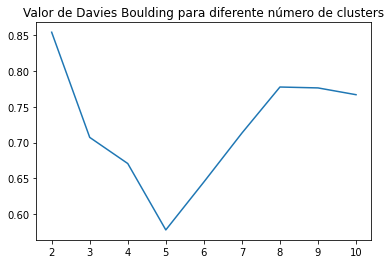

In [38]:
    plt.plot(range(2, K_MAX), davies_boulding_aglo) #mostramos el gráfico que buscamos
    plt.title('Valor de Davies Boulding para diferente número de clusters')
    print('Mostramos los índices de Davies Boulding: ',davies_boulding_aglo) #mostramos los valores de davies boulding
    #Después de mirar la gráfica y los valores del array vemos que el número óptimo de clusters es 5

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


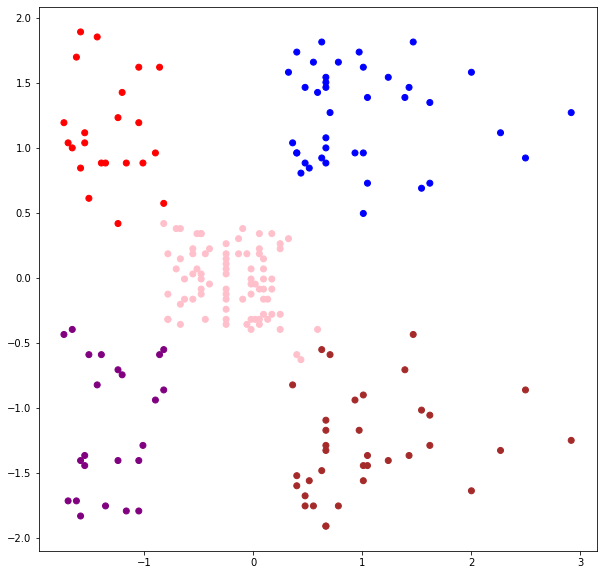

cluster                                 0.0         1.0        2.0        3.0  \
Age                        count  22.000000   39.000000  81.000000  22.000000   
                           mean   45.090909   40.384615  42.802469  25.590909   
                           std    13.525669   11.226415  16.435799   5.386571   
                           min    19.000000   19.000000  18.000000  18.000000   
                           25%    35.250000   34.000000  27.000000  21.250000   
                           50%    45.500000   41.000000  47.000000  23.500000   
                           75%    53.750000   47.000000  54.000000  30.000000   
                           max    67.000000   59.000000  70.000000  35.000000   
Annual Income (k$)         count  22.000000   39.000000  81.000000  22.000000   
                           mean   25.727273   86.538462  54.888889  25.727273   
                           std     7.566731   16.312485   8.961027   7.566731   
                           min    15.000000   69.000000  39.000000  15.000000   
                           25%    19.250000   75.500000  48.000000  19.250000   
                           50%    24.500000   79.000000  54.000000  24.500000   
                           75%    32.250000   95.000000  62.000000  32.250000   
                           max    39.000000  137.000000  75.000000  39.000000   
Spending Score (1-100)     count  22.000000   39.000000  81.000000  22.000000   
                           mean   20.227273   19.641026  50.975309  79.181818   
                           std    12.891237   12.480484   8.811889  10.795221   
                           min     3.000000    1.000000  36.000000  61.000000   
                           25%     7.750000   10.500000  46.000000  73.000000   
                           50%    16.000000   17.000000  50.000000  77.000000   
                           75%    31.750000   27.500000  55.000000  85.750000   
                           max    40.000000   58.000000  93.000000  99.000000   
Annual Income (standard)   count  22.000000   39.000000  81.000000  22.000000   
                           mean   -1.329545    0.991583  -0.216463  -1.329545   
                           std     0.288818    0.622638   0.342037   0.288818   
                           min    -1.738999    0.322150  -0.822933  -1.738999   
                           25%    -1.576779    0.570251  -0.479408  -1.576779   
                           50%    -1.376390    0.703844  -0.250391  -1.376390   
                           75%    -1.080577    1.314555   0.054964  -1.080577   
                           max    -0.822933    2.917671   0.551167  -0.822933   
Spending Score (standard)) count  22.000000   39.000000  81.000000  22.000000   
                           mean   -1.163588   -1.186347   0.030099   1.125119   
                           std     0.500458    0.484512   0.342091   0.419087   
                           min    -1.832378   -1.910021  -0.551266   0.419273   
                           25%    -1.647975   -1.541216  -0.163051   0.885132   
                           50%    -1.327697   -1.288876  -0.007764   1.040418   
                           75%    -0.716258   -0.881249   0.186343   1.380106   
                           max    -0.395980    0.302808   1.661563   1.894492   

cluster                                  4.0  
Age                        count   35.000000  
                           mean    32.657143  
                           std      3.749062  
                           min     27.000000  
                           25%     30.000000  
                           50%     32.000000  
                           75%     35.500000  
                           max     40.000000  
Annual Income (k$)         count   35.000000  
                           mean    86.342857  
                           std     14.262132  
                           min     69.000000  
                           25%     77.000000  
                    

In [41]:
#Como habiamos visto que el numero óptimo de clusters era 5 hacemos el AgglomerativeClustering de sckitlearn con k = 5 al igual que en el k means
cinco_aglomerative_aglo = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
cinco_aglomerative_aglo.fit(df[['Annual Income (standard)', 'Spending Score (standard))']])
#establecemos los labels necesarios
cinco_labels_aglo = cinco_means.labels_
#imprimimos los clusters
plot_clusters(cinco_labels_aglo)
#Añadimos a los datos el cluster en el que se encuentra cada dato entonces como hemos visto en el enunciado los datos están ordenados
#Así podemos analizar cada cluster sin ningún problema y analizarlos al igual que en el k-means
df_aux_aglo = df.assign(cluster=pd.Series(data=cinco_means.labels_))
df_aux_aglo
df_aux_aglo.groupby(["cluster"]).describe().transpose()